<a href="https://colab.research.google.com/github/Harika-Mullaguri/Deep-Learning/blob/main/Text_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import re

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.feature_extraction import text

In [ ]:
documents = [
    "Natural language processing is a fascinating field of artificial intelligence.",
    "Text analysis and word clouds are popular NLP techniques.",
    "Python provides excellent libraries for NLP tasks like NLTK and spaCy.",
    "Machine learning and deep learning have revolutionized NLP applications.",
    "Word embeddings and transformers are state-of-the-art in NLP nowadays."
]

In [ ]:
stop_words = text.ENGLISH_STOP_WORDS


Bag of Words (BOW) Representation:
   analysis  applications  art  artificial  clouds  deep  embeddings  \
0         0             0    0           1       0     0           0   
1         1             0    0           0       1     0           0   
2         0             0    0           0       0     0           0   
3         0             1    0           0       0     1           0   
4         0             0    1           0       0     0           1   

   excellent  fascinating  field  ...  provides  python  revolutionized  \
0          0            1      1  ...         0       0               0   
1          0            0      0  ...         0       0               0   
2          1            0      0  ...         1       1               0   
3          0            0      0  ...         0       0               1   
4          0            0      0  ...         0       0               0   

   spacy  state  tasks  techniques  text  transformers  word  
0      0      0  

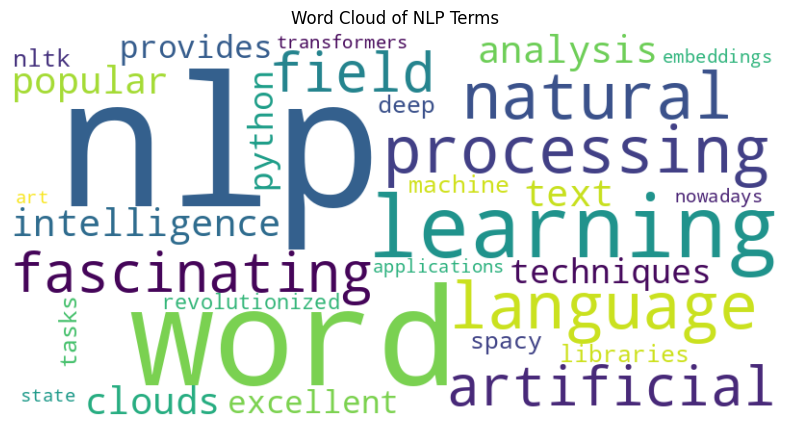

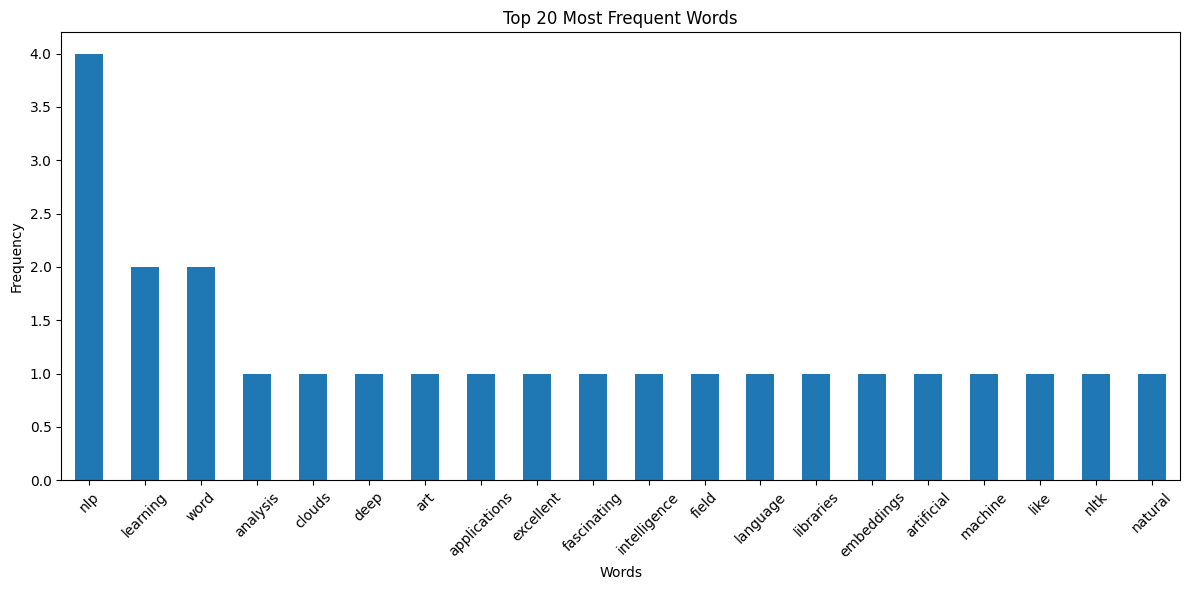

In [ ]:
def preprocess_text(text):
    text = text.lower()
    tokens = re.findall(r'\b[a-z]+\b', text)  # Keep only words
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Preprocess all documents
processed_docs = [preprocess_text(doc) for doc in documents]

# Create Bag of Words (BOW) representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(processed_docs)

# Convert BOW matrix to DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nBag of Words (BOW) Representation:")
print(bow_df)

# Generate word cloud
all_text = ' '.join(processed_docs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of NLP Terms')
plt.show()

# Top 20 frequent words
word_freq = bow_df.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
word_freq.plot(kind='bar')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
docs = [
    "The cat is sitting on the mat.",
    "NLP helps computers understand human language.",
    "The dog is playing with the cat."
]

In [ ]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(docs)
print("\nBag of Words Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Matrix:\n",bow.toarray())


Bag of Words Vocabulary: ['cat' 'computers' 'dog' 'helps' 'human' 'is' 'language' 'mat' 'nlp' 'on'
 'playing' 'sitting' 'the' 'understand' 'with']
BoW Matrix:
 [[1 0 0 0 0 1 0 1 0 1 0 1 2 0 0]
 [0 1 0 1 1 0 1 0 1 0 0 0 0 1 0]
 [1 0 1 0 0 1 0 0 0 0 1 0 2 0 1]]


In [ ]:

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(docs)
print("\nTF-IDF Vocabulary:", tfidf.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


TF-IDF Vocabulary: ['cat' 'computers' 'dog' 'helps' 'human' 'is' 'language' 'mat' 'nlp' 'on'
 'playing' 'sitting' 'the' 'understand' 'with']
TF-IDF Matrix:
 [[0.29898437 0.         0.         0.         0.         0.29898437
  0.         0.39312851 0.         0.39312851 0.         0.39312851
  0.59796874 0.         0.        ]
 [0.         0.40824829 0.         0.40824829 0.40824829 0.
  0.40824829 0.         0.40824829 0.         0.         0.
  0.         0.40824829 0.        ]
 [0.29898437 0.         0.39312851 0.         0.         0.29898437
  0.         0.         0.         0.         0.39312851 0.
  0.59796874 0.         0.39312851]]
